# Задача 1.4

Частота распределения слов в языке описывается законом Ципфа.

Проверить, что он действительно описывает частоту слов (через формальный критерий) на основе анализа двух документов: Анны Карениной и новостного корпуса. Можно ли утверждать, что параметры закона Ципфа для этих двух корпусов совпадают?

Пояснение по закону Ципфа: закон Ципфа утверждает, что в выборке из N элементов частота (вероятность) встретить элемент с рангом K равняется: const / K^a, где a --- параметр распределения.

# Решение

Произведу предобработку, оставив только слова в ловеркейсе

In [269]:
filename = 'ru.txt'
file = open(filename, 'r',encoding='utf8')
text = file.read()
file.close()
# split into words by white space
words = text.split()
# remove punctuation from each word
import string
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in words]
stripped = [x.lower() for x in stripped]
print(stripped[:100])

['члены', 'национальной', 'ассамблеи', 'уэльса', 'обеспокоены', 'что', 'выглядят', 'как', 'куклы', 'некоторые', 'члены', 'национальной', 'ассамблеи', 'уэльса', 'в', 'ужасе', 'от', 'предложения', 'о', 'том', 'что', 'их', 'наименование', 'должно', 'измениться', 'на', 'mpw', 'члены', 'парламента', 'уэльса', 'этот', 'вопрос', 'был', 'поднят', 'в', 'связи', 'с', 'планами', 'по', 'переименованию', 'ассамблеи', 'в', 'парламент', 'уэльса', 'члены', 'национальной', 'ассамблеи', 'уэльса', 'всего', 'политического', 'спектра', 'обеспокоены', 'что', 'это', 'может', 'породить', 'насмешки', 'один', 'из', 'лейбористских', 'членов', 'национальной', 'ассамблеи', 'уэльса', 'сказал', 'что', 'его', 'партия', 'обеспокоена', 'тем', 'что', 'это', 'рифмуется', 'с', 'twp', 'и', 'pwp', 'для', 'читателей', 'за', 'предлами', 'уэльса', 'поваллийски', 'twp', 'означает', 'глупый', 'а', 'pwp', 'означает', 'какашка', 'член', 'национальной', 'ассамблеи', 'от', 'плайд', 'сказал', 'что', 'эта', 'партия', 'в']


Изобразим на графике частоты, с которыми встречаются слова

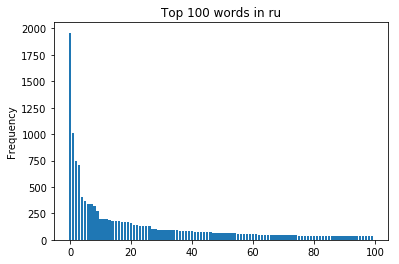

In [271]:
from collections import Counter
import pandas as pd
import matplotlib.pylab as plt
counts = Counter(stripped)
#print(counts)
words = []
freq = []
for key in counts:
    words.append(key)
    freq.append(counts[key])
df1 = pd.DataFrame({'word':words,'frequency':freq}).sort_values('frequency',ascending = False).reset_index()
plt.bar(list(df1.index)[:100], list(df1['frequency'].values)[:100])
plt.ylabel('Frequency')
plt.title('Top 100 words in ru')
plt.show()

С помощью МНК найдем оптимальные значения констант a и C из предполагаемого распределения. В расчет берем только те слова, которых встретилось больше 10.

In [284]:
import math
df1['y'] = df1['frequency'].apply(lambda x: math.log(x))

In [285]:
import numpy as np
y = list(df1[df1['frequency']>10]['y'].values)
x = np.arange(1,len(y)+1)
for i in range(len(x)):
    x[i] = math.log(x[i])
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y)[0]

C:\Users\rukub\Anaconda3\AN\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  import sys


In [287]:
C = math.exp(c)
a = -m
print('a =',a, 'C =',C)
x = np.arange(1,100)
y = []
for el in x:
    y.append(C/el**a)

a = 0.8834207093694697 C = 1188.0205951499393


Изобразим предполагаемое распределение частот и эксперементальное

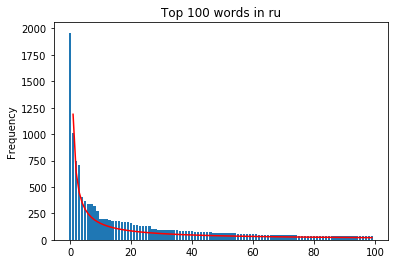

In [275]:
plt.plot(x,y,c='red')
plt.bar(list(df1.index)[:100], list(df1['frequency'].values)[:100])
plt.ylabel('Frequency')
plt.title('Top 100 words in ru')
plt.show()

Посчитаем p-value для нашего экспериментального распределения частот

In [276]:
from scipy.stats import chisquare
x = np.arange(1,len(list(df1[df1['frequency']>10]['frequency'].values))+1)
y = []
for el in x:
    y.append(C/el**a)
chisquare(list(df1[df1['frequency']>10]['frequency'].values),f_exp = y,ddof=1)

Power_divergenceResult(statistic=5117.334555409471, pvalue=0.0)

Проделаем все тоже самое для Карениной:

In [277]:
filename = 'каренина.txt'
file = open(filename, 'r',encoding='utf8')
text = file.read()
file.close()
# split into words by white space
words = text.split()
# remove punctuation from each word
import string
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in words]
stripped = [x.lower() for x in stripped]
print(stripped[:100])

['лев', 'николаевич', 'толстой', 'анна', 'каренина', 'мне', 'отмщение', 'и', 'аз', 'воздам', 'часть', 'первая', 'i', 'все', 'счастливые', 'семьи', 'похожи', 'друг', 'на', 'друга', 'каждая', 'несчастливая', 'семья', 'несчастлива', 'посвоему', 'все', 'смешалось', 'в', 'доме', 'облонских', 'жена', 'узнала', 'что', 'муж', 'был', 'в', 'связи', 'с', 'бывшею', 'в', 'их', 'доме', 'француженкоюгувернанткой', 'и', 'объявила', 'мужу', 'что', 'не', 'может', 'жить', 'с', 'ним', 'в', 'одном', 'доме', 'положение', 'это', 'продолжалось', 'уже', 'третий', 'день', 'и', 'мучительно', 'чувствовалось', 'и', 'самими', 'супругами', 'и', 'всеми', 'членами', 'семьи', 'и', 'домочадцами', 'все', 'члены', 'семьи', 'и', 'домочадцы', 'чувствовали', 'что', 'нет', 'смысла', 'в', 'их', 'сожительстве', 'и', 'что', 'на', 'каждом', 'постоялом', 'дворе', 'случайно', 'сошедшиеся', 'люди', 'более', 'связаны', 'между', 'собой', 'чем', 'они']


In [278]:
len(stripped)

280387

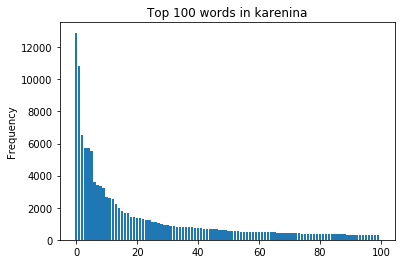

In [279]:
counts = Counter(stripped)
#print(counts)
words = []
freq = []
for key in counts:
    words.append(key)
    freq.append(counts[key])
df2 = pd.DataFrame({'word':words,'frequency':freq}).sort_values('frequency',ascending = False).reset_index()
plt.bar(list(df2.index)[:100], list(df2['frequency'].values)[:100])
plt.ylabel('Frequency')
plt.title('Top 100 words in karenina')
plt.show()

In [280]:
df2['y'] = df2['frequency'].apply(lambda x: math.log(x))

y = list(df2[df2['frequency']>10]['y'].values)
x = np.arange(1,len(y)+1)
for i in range(len(x)):
    x[i] = math.log(x[i])
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y)[0]

C:\Users\rukub\Anaconda3\AN\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


In [281]:
C = math.exp(c)
a = -m

print(a, C)
x = np.arange(1,100)
y = []
for el in x:
    y.append(C/el**a)

0.9808465152833046 14431.373424470137


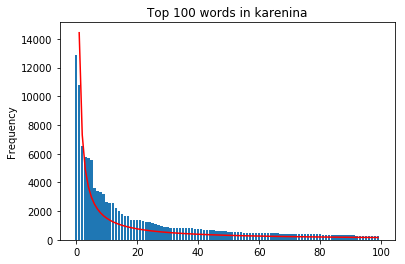

In [282]:
plt.plot(x,y,c='red')
plt.bar(list(df2.index)[:100], list(df2['frequency'].values)[:100])
plt.ylabel('Frequency')
plt.title('Top 100 words in karenina')
plt.show()

In [283]:
from scipy.stats import chisquare
x = np.arange(1,len(list(df2[df2['frequency']>10]['frequency'].values))+1)
y = []
for el in x:
    y.append(C/el**a)
chisquare(list(df2[df2['frequency']>10]['frequency'].values),f_exp = y,ddof=1)

Power_divergenceResult(statistic=73031.68842259383, pvalue=0.0)

# Вывод

На разумном уровне значимости мы вынуждены отклонить гипотезы о том, что частоты слов в текстах имеют распределeние именно с такими параметрами, как найдено выше, хотя визуально полученные зависимости очень неплохо апроксимируют эксперементальные данные.